# The Python ecosystem - The scikit-learn library

Scikit-learn is probably the most used Machine Learning Library in Python. It is built on NumPy, SciPy, and matplotlib. The library offers a simple and efficient tools for data mining and data analysis. Scikit-learn offers a cosnistent API acorss differnet model and applications and hence is one of the best tools in Python for shallow learning algorithms.  

## Modeling pipeline in scikit learn 

* Loading The Data
* Training And Test Data
* Preprocessing The Data
* Create the Model
* Model Fitting
* Prediction
* Evaluate the Model's Performance
* Tune the Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Add the `src` directory as one where we can import modules**

In [2]:
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src'))
sys.path.append(src_dir)
print(src_dir)

C:\Users\josi\Documents\workshop-data-science\src


In [3]:
import helper_funcs as hf

## Loading The Data

Your data needs to be numeric and stored as NumPy arrays or SciPy sparse matrices. Other types that are convertible to numeric arrays, such as Pandas `DataFrame`, are also acceptable.

**Data for a Machine Learning model may look like this...**

In [4]:
import numpy as np
X = np.random.random((10,5))
X[X < 0.3] = 0
print("Features array: {}\n".format(X.shape), X)
y = np.array(['M','M','F','F','F','M','M','F','F','F'])
print("Labels: {}\n".format(y.shape),y)

Features array: (10, 5)
 [[0.85035024 0.71893839 0.46319863 0.78382602 0.        ]
 [0.         0.36150622 0.66100277 0.97893958 0.        ]
 [0.31009341 0.         0.         0.73505173 0.        ]
 [0.84463115 0.         0.47210307 0.36979784 0.        ]
 [0.36463706 0.41668724 0.67216457 0.7192339  0.71490165]
 [0.         0.96983517 0.71764347 0.68532552 0.75181028]
 [0.57205263 0.71851875 0.39258517 0.73879698 0.69422453]
 [0.         0.51936119 0.52495511 0.         0.41521334]
 [0.8043631  0.9781962  0.45841816 0.59513743 0.99463586]
 [0.46366494 0.         0.67386551 0.         0.94837818]]
Labels: (10,)
 ['M' 'M' 'F' 'F' 'F' 'M' 'M' 'F' 'F' 'F']


Further scikit-learn provides a rich [dataset loading utilities](http://scikit-learn.org/stable/datasets/index.html). It comes with easy to load toy datasets, sample images and sample generators.

**Toy datasets:**

Boston house-prices dataset (regression)

    load_boston() 	
    
Iris dataset (classification)

    load_iris()

Diabetes dataset (regression)

    load_diabetes() 

Digits dataset (classification)

    load_digits()

Linnerud dataset (multivariate regression) 

    load_linnerud()
 
Wine dataset (classification)
  
    load_wine() 	

Breast cancer wisconsin dataset (classification)
  
    load_breast_cancer() 	
    

In [5]:
from sklearn.datasets import load_boston
ds = load_boston()

In [6]:
print(ds.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
print("Features array: {}\n".format(ds.data.shape), ds.data)
print("Labels: {}\n".format(ds.target.shape),y)

Features array: (506, 13)
 [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Labels: (506,)
 ['M' 'M' 'F' 'F' 'F' 'M' 'M' 'F' 'F' 'F']


**Sample generators:**

In [8]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=25, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           random_state=33)

In [9]:
print("Features array: {}\n".format(X.shape), X)
print("Labels: {}\n".format(y.shape),y)

Features array: (25, 2)
 [[ 0.84119533 -0.59034282]
 [ 0.30073529  1.32948683]
 [-0.35158507  0.72574001]
 [ 0.7203474  -0.57451647]
 [-1.91833439  2.08364911]
 [ 0.9030502   1.23783064]
 [-0.15302041  0.91097803]
 [ 1.44607025 -1.28411479]
 [-1.61288264 -0.64351396]
 [-0.9272653   0.24159894]
 [ 1.48322117  0.03325729]
 [-1.33804029  0.57162232]
 [-1.69935283  1.3004686 ]
 [-0.72134521  0.3439439 ]
 [ 0.2942302  -0.16300197]
 [-0.0526431   1.76285091]
 [-1.17874604 -0.62427607]
 [ 0.49636809  0.57330408]
 [ 0.93851305  0.34952606]
 [-0.16227224  0.42789673]
 [ 0.43508675 -1.94956553]
 [ 2.56176732 -1.68777497]
 [ 0.83080315  0.23559069]
 [ 1.19118673 -0.55582212]
 [-0.26748919  0.38544401]]
Labels: (25,)
 [0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1]


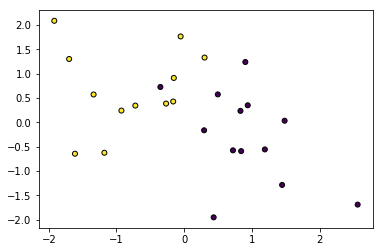

In [10]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

## Training And Test Data

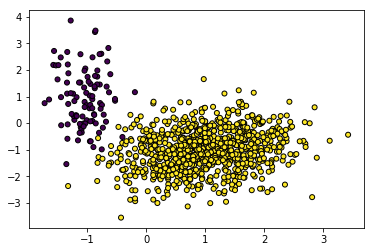

In [11]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           weights=[0.096], 
                           random_state=33)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

In [12]:
np.bincount(y)

array([100, 900], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,  
                                                    shuffle=True, random_state=42)

In [14]:
print("Train set size:" , X_train.shape, "\nTest set size:", X_test.shape)

Train set size: (600, 2) 
Test set size: (400, 2)


In [15]:
print("Train label size:" , y_train.shape, "\nTest label size:", y_test.shape)

Train label size: (600,) 
Test label size: (400,)


In [16]:
pd.Series(y_train).value_counts()

1    542
0     58
dtype: int64

In [17]:
pd.Series(y_test).value_counts()

1    358
0     42
dtype: int64

This `stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter `stratify`. 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.4, random_state=42)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

1    540
0     60
dtype: int64
1    360
0     40
dtype: int64


## Preprocessing The Data

In general, __learning algorithms benefit from standardization of the data set__. The `sklearn.preprocessing` package provides several utility functions and transformer classes to change raw feature vectors.


In [19]:
from sklearn import preprocessing

In [20]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [21]:
scaler = preprocessing.StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
X_train_scaled = scaler.transform(X_train) 
X_train_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [24]:
print("Mean: ",np.mean(X_train_scaled, axis=0))
print("\nStandard deviation: ", np.std(X_train_scaled, axis=0))

Mean:  [0. 0. 0.]

Standard deviation:  [1. 1. 1.]


An alternative standardization is __aling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size__

In [25]:
X_train 

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [26]:
min_max_scaler = preprocessing.MinMaxScaler()

In [27]:
min_max_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
X_train_scaled = min_max_scaler.transform(X_train) 
X_train_scaled

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [29]:
print("Min: ", np.min(X_train_scaled, axis=0))
print("\nMax: ", np.max(X_train_scaled, axis=0))

Min:  [0. 0. 0.]

Max:  [1. 1. 1.]


###  Encoding categorical features

Often features are not given as continuous values but categorical. For example a person could have features `"male"`, `"female"` or `"high"`, `"low"`, `"medium"`. Such features can be efficiently coded as integers, such as `0`, `1` (_nominal_)  or `2`, `0`, `1` (_ordinal_).

In [30]:
X_train = np.array([['Male', 1, 0.76], ['Female', 3, 0.22], ['Female', 2, 0.57]])
X_train

array([['Male', '1', '0.76'],
       ['Female', '3', '0.22'],
       ['Female', '2', '0.57']], dtype='<U6')

In [31]:
X_train[:,0]

array(['Male', 'Female', 'Female'], dtype='<U6')

#### Label encoding

In [32]:
le = preprocessing.LabelEncoder()
le.fit(X_train[:,0])

LabelEncoder()

In [33]:
list(le.classes_)

['Female', 'Male']

In [34]:
le.transform(X_train[:,0]) 

array([1, 0, 0], dtype=int64)

In [35]:
X_encoded = np.copy(X_train)
X_encoded[:,0] = le.transform(X_train[:,0])
X_encoded = X_encoded.astype(float)
X_encoded

array([[1.  , 1.  , 0.76],
       [0.  , 3.  , 0.22],
       [0.  , 2.  , 0.57]])

In [36]:
le.inverse_transform(X_encoded[:,0].astype(int))

C:\Users\josi\Miniconda3\envs\data-science\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Male', 'Female', 'Female'], dtype='<U6')

#### One-Hot encoding

In [37]:
X_encoded[:,0].reshape(-1,1)

array([[1.],
       [0.],
       [0.]])

In [38]:
ohe = preprocessing.OneHotEncoder()
ohe.fit(X_encoded[:,0].reshape(-1,1))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [39]:
X_train[:,0]

array(['Male', 'Female', 'Female'], dtype='<U6')

In [40]:
ohe.transform(X_encoded[:,0].reshape(-1,1)).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.]])


_Note that starting with scikit-learn version 20.0 there will be a `CategoricalEncoder` available to convert categorical features to by __one-hot encoding__ or __ordinal encoding__ in one step_. 

In [41]:
import sklearn
sklearn.__version__

'0.19.1'

### Imputation of missing values

Many real world datasets contain missing values, often encoded as blanks, `NaN`s or other placeholders. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. Another strategy is to impute the missing values, i.e., to infer them from the known part of the data.

IN scikit-learn the `Imputer` class provides basic strategies for imputing missing values, either using __the mean__, __the median__ or __the most frequent value__ of the row or column in which the missing values are located. 

In [42]:
X_train = np.array([[1, 2], [np.nan, 3], [7, 6]])
X_train

array([[ 1.,  2.],
       [nan,  3.],
       [ 7.,  6.]])

In [43]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [44]:
np.nanmean(X_train, axis=0)

array([4.        , 3.66666667])

In [45]:
imp.transform(X_train)

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

## Create the Model

Sciit-learn ships with a hugh variety of differnet supervised and unsupervised models as well as some basic neural network models; among those are:

* ### Linear models
  * Ordinary Least Squares
  * Polynomial regression
  * Ridge Regression
  * Lasso
  * Elastic Net
  * Logistic regression

* ### Support Vector Machines

* ### Nearest Neighbors

* ### Gaussian Processes

* ### Decision Trees

* ### Ensemble methods
  * Random Forest
  * Gradient Boosting

Visit the [scikit-learn documentation website](http://scikit-learn.org/stable/index.html) for a comprehensive list of avaiake models and techniques. 

### Loading a toy data set

For  the sake of this tutorial we load the _wine dataset_ provided by scikit learn.

In [46]:
from sklearn.datasets import load_wine

In [47]:
ds = load_wine()
print(ds.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [48]:
ds.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [49]:
ds.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Subsetting the data set to two classes

In [50]:
y = ds.target[ds.target < 2]
y.shape

(130,)

In [51]:
X = ds.data[ds.target < 2]
X.shape

(130, 13)

### Train-test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(91, 13)
(39, 13)
(91,)
(39,)


### Creation of a model instance 

In [54]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Model Fitting

In [55]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Prediction

### In-sample prediction

In [56]:
logistic.predict(X_train)

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1])

### Out of sample prediction

In [57]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [58]:
logistic.predict_proba(X_test)[:5]

array([[9.98037466e-01, 1.96253425e-03],
       [9.51319579e-01, 4.86804206e-02],
       [9.95410445e-01, 4.58955476e-03],
       [9.99999431e-01, 5.69234600e-07],
       [1.36486466e-04, 9.99863514e-01]])

##  Evaluate the Model's Performance

In scikit-learn there are 3 different APIs for evaluating the quality of a model’s predictions:

* __Estimator score method__: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. 
* __Scoring parameter__: Model-evaluation tools using cross-validation rely on an internal scoring strategy. 
* __Metric functions__: The metrics module implements functions assessing prediction error for specific purposes. Functions ending with `_score` return a value to maximize, the higher the better, and Functions ending with `_error` or `_loss` return a value to minimize, the lower the better.

### Estimator score method

Returns the mean accuracy on the given test data and labels.

$$\text{accuracy}(y, \hat y) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1}\mathbb1(\hat y_i = y_i)$$

In [59]:
logistic.score(X_test, y_test)

0.8717948717948718

In [60]:
np.sum(y_pred == y_test)/len(y_test)

0.8717948717948718

### Metric functions

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8717948717948718

Note that there are many more [model metrics](http://scikit-learn.org/stable/modules/model_evaluation.html) avaibale in scikit-learn.  

In [62]:
dir(sklearn.metrics)[11:]

['accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'base',
 'brier_score_loss',
 'calinski_harabaz_score',
 'classification',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_similarity_score',
 'label_ranking_average_precision_score',
 'label_ranking_loss',
 'log_loss',
 'make_scorer',
 'matthews_corrcoef',
 'mean_absolute_error',
 'mean_squared_error',
 'mean_squared_log_error',
 'median_absolute_error',
 'mutual_info_score',
 'normalized_mutual_info_score',
 'pairwise',
 'pairwise_distances',
 'pairwise_distances_argmin',
 'pairwise_distances_argmin_min',
 'pairwise_fast',
 'pairwise_kernels',
 'precision_reca

## Tune the Model

Be aware that there are two types of parameters: 
* __model parameters__ and 
* __hyperparameters__. 

Models parameters (i.e. regression coefficients) are learned from the data. Hyperparameters however, are parameters whose values are set before the learning process begins. Different model training algorithms require different hyperparameters, some simple algorithms  require none. 

The optimal hyperparameter configuaration for a particualr modeling task is unknown. Hence, we apply differnet techniquens, such as grid search, random search od Baysian optimization to approximate the best hyperparamter configiatiuon (refrred to as [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization).

Durning the process of model optimization we want to avoid [overfitting](https://en.wikipedia.org/wiki/Overfitting). Hence, in machine learning a technique referred to as [k-fold cross-validation][1] is applied. Cross-validation is a process for reliably estimating the performance of a method for building a model by training and evaluating your model multiple times using the same method.

#### K-fold cross-validation (Source: [Wikipedia][1])
![](./_img/K-fold_cross_validation_EN.png)


[1]: https://en.wikipedia.org/wiki/Cross-validation_(statistics)

### Model creation

For the purpose of this tutorail we apply [support vector machines]() (SVMs) for classiftion of the subseted _wine data set_ (see above). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. 

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. 

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates.
* SVM do not scale well.



The mathematics of the algormton are beyond the scope of this tutrial, but if you are intertested we suggest to dive intoe the [scikit-learn documetnation](http://scikit-learn.org/stable/modules/svm.html) or watch the informative [video](https://www.youtube.com/watch?v=-Z4aojJ-pdg) by Brandon Rohrer.

In [63]:
from sklearn import svm
svc = svm.SVC()
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Hyperparameter optimization using `GridSearchCV`

* `C`: Penalty parameter `C` of the error term. The parameter allows one to trade off training error vs. model complexity. Hence, the `C` parameter trades off misclassification of training examples against simplicity of the decision surface. A low `C` makes the decision surface smooth, while a high `C` aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

* `kernel`:  Specifies the kernel type to be used in the algorithm. It must be one of `linear`, `poly`, `rbf`, `sigmoid`, `precomputed` or a callable. 

* `gamma`: Kernel coefficient for `rbf`, `poly` and `sigmoid`. Intuitively, the `gamma` parameter defines how far the influence of a single training example reaches, with low values meaning _far_ and high values meaning _close_. The `gamma` parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [0.1, 1, 10, 100],
               'gamma': [0.01, 0.001, 0.0001],
               'kernel': ['linear', 'rbf']}]

clf = GridSearchCV(svc, param_grid, cv=5, verbose=1, return_train_score=True)

### Model fitting

In [87]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   42.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.001, 0.0001], 'degree': [3, 5, 7], 'kernel': ['linear', 'poly', 'rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

### Cross validation results

In [88]:
pd.DataFrame(clf.cv_results_ )

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_degree,param_gamma,param_kernel,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.012,0.000,0.989011,0.989040,0.1,3,0.01,linear,"{'C': 0.1, 'degree': 3, 'gamma': 0.01, 'kernel...",1,...,1.000000,0.986301,1.000000,0.986301,1.000000,0.986486,0.007483,0.000000,0.021392,0.005481
1,0.194,0.000,0.989011,1.000000,0.1,3,0.01,poly,"{'C': 0.1, 'degree': 3, 'gamma': 0.01, 'kernel...",1,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.096871,0.000000,0.021392,0.000000
2,0.002,0.002,0.571429,0.571428,0.1,3,0.01,rbf,"{'C': 0.1, 'degree': 3, 'gamma': 0.01, 'kernel...",106,...,0.555556,0.575342,0.555556,0.575342,0.588235,0.567568,0.004000,0.004000,0.013268,0.003269
3,0.016,0.004,0.989011,0.989040,0.1,3,0.001,linear,"{'C': 0.1, 'degree': 3, 'gamma': 0.001, 'kerne...",1,...,1.000000,0.986301,1.000000,0.986301,1.000000,0.986486,0.004899,0.004899,0.021392,0.005481
4,0.152,0.000,0.989011,1.000000,0.1,3,0.001,poly,"{'C': 0.1, 'degree': 3, 'gamma': 0.001, 'kerne...",1,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.080349,0.000000,0.021392,0.000000
5,0.000,0.002,0.615385,0.632051,0.1,3,0.001,rbf,"{'C': 0.1, 'degree': 3, 'gamma': 0.001, 'kerne...",103,...,0.611111,0.589041,0.555556,0.575342,0.647059,0.648649,0.000000,0.004000,0.046533,0.043963
6,0.012,0.000,0.989011,0.989040,0.1,3,0.0001,linear,"{'C': 0.1, 'degree': 3, 'gamma': 0.0001, 'kern...",1,...,1.000000,0.986301,1.000000,0.986301,1.000000,0.986486,0.004000,0.000000,0.021392,0.005481
7,0.046,0.002,0.989011,0.986337,0.1,3,0.0001,poly,"{'C': 0.1, 'degree': 3, 'gamma': 0.0001, 'kern...",1,...,1.000000,0.986301,1.000000,0.986301,1.000000,0.972973,0.029394,0.004000,0.021392,0.008548
8,0.002,0.000,0.934066,0.956047,0.1,3,0.0001,rbf,"{'C': 0.1, 'degree': 3, 'gamma': 0.0001, 'kern...",76,...,1.000000,0.945205,1.000000,0.958904,0.882353,0.959459,0.004000,0.000000,0.053529,0.010331
9,0.010,0.000,0.989011,0.989040,0.1,5,0.01,linear,"{'C': 0.1, 'degree': 5, 'gamma': 0.01, 'kernel...",1,...,1.000000,0.986301,1.000000,0.986301,1.000000,0.986486,0.006325,0.000000,0.021392,0.005481


`best_params_`: Parameter setting that gave the best results on the hold out data.

In [89]:
clf.best_params_

{'C': 0.1, 'degree': 3, 'gamma': 0.01, 'kernel': 'linear'}

`best_estimator_`: Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 

In [79]:
clf.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

`best_score_`: Mean cross-validated score of the best_estimator

In [90]:
clf.best_score_ 

0.989010989010989

### Model preditction

In [81]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

### Model evaluation

**Accuracy**

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9743589743589743

**Confusion matrix**

In [83]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19,  1],
       [ 0, 19]], dtype=int64)

Confusion matrix, without normalization


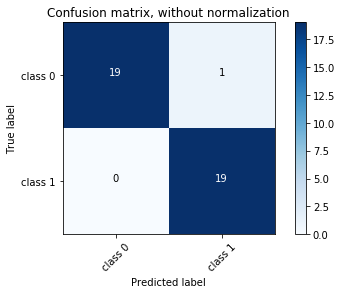

In [84]:
# Plot non-normalized confusion matrix
hf.plot_confusion_matrix(cnf_matrix, classes=["class 0", "class 1"],
                      title='Confusion matrix, without normalization')

**Seclected classification metrics**

\begin{equation} 
\text{precision} = \frac{TP}{TP+FP}
\end{equation}

\begin{equation} 
\text{recall} = \frac{TP}{TP+FN}
\end{equation}

\begin{equation} 
\text{F1-score} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision}+\text{recall}}
\end{equation}

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97        20
          1       0.95      1.00      0.97        19

avg / total       0.98      0.97      0.97        39

